# Задание 3. Pandas (HW)
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Часть 1. Обработка файла questions.csv (метаданные для заданных студентам вопросов)

# 1.1. Структура

- question_id: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).
- bundle_id: идентификатор совместного набора вопросов.
- correct_answer: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.
- part: соответствующий раздел теста TOEIC.
- tags: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

# 1.2. Анализ

In [5]:
questions_df = pd.read_csv('questions.csv') 
questions_df.shape

(13523, 5)

Выведем строки датафрейма questions_df c помощью метода .head

In [6]:
questions_df.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


Выведем статистику по числовым признакам датафрейма questions_df c помощью метода .describe

In [7]:
questions_df.describe()

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


Найдем пропуски в датафрейме questions_df с помощью метода .isna()

In [8]:
questions_df.isna().sum()

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

Как видно, применение метода показало, что имеется один пропуск в столбце тегов.

Выведем информацию о том, где он находится:

In [9]:
questions_df[questions_df.tags.isna()]

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


Далее перейдем к обнаружению дубликатов в рассматриваемом датафрейме

In [10]:
questions_df.duplicated().sum() 

0

Как мы можем увидеть дубликаты в датафрейме questions_df отсутствуют.

С помощью метода .info выведем справку о количестве значений в каждом столбце и типе данных рассматриваемого датафрейма

In [11]:
questions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


Теперь выведем распределение значений внешних ключей, соответствующих каждому значению в столбце разделов

In [12]:
questions_df[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


# 1.3. Визуализация

<AxesSubplot:xlabel='part', ylabel='Count'>

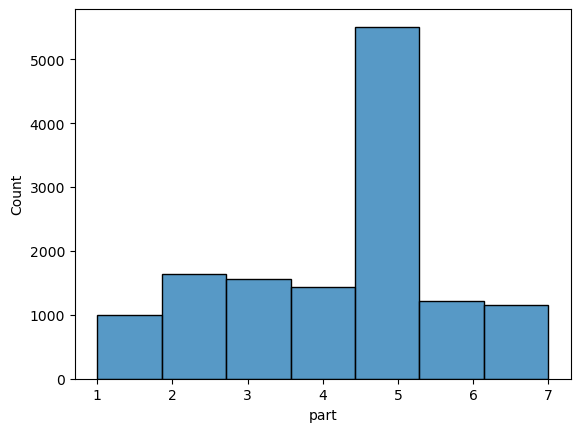

In [13]:
sns.histplot(data = questions_df, x = 'part', bins = 7)

# 1.4. Промежуточные итоги

По результатам анализа следует, что внешние ключи по всем разделам распределены практически без отклонений (кроме пятого).


# Часть 2. Обработка файла lectures.csv (метаданные для лекций, просмотренных пользователями (студентами) по мере их обучения)

# 2. 1. Структура 

- lecture_id: внешний ключ для столбца content_type_id в train.csv, если тип контента - лекция (1).
- part: раздел, к которому относится лекция.
- tag: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.
- type_of: краткое описание основной цели лекции.

# 2. 2. Анализ 

In [14]:
lectures_df = pd.read_csv('lectures.csv', encoding = 'utf-8')
lectures_df.shape

(418, 4)

Выведем строки датафрейма lectures_df c помощью метода .head

In [15]:
lectures_df.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


Выводим статистику по числовым признакам датафрейма lectures_df c помощью метода .describe

In [16]:
lectures_df.describe()

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


Ищем пропуски в датафрейме df_lectures с помощью метода .isna()

In [17]:
lectures_df.isna().sum() 

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

Как мы можем увидеть пропуски в датафрейме df_lectures отсутствуют.

Далее перейдем к обнаружению дубликатов в рассматриваемом датафрейме

In [18]:
lectures_df.duplicated().sum()

0

Как мы можем увидеть дубликаты в датафрейме df_lectures также отсутствуют.

С помощью метода .info выведем справку о количестве значений в каждом столбце и типе данных рассматриваемого датафрейма

In [19]:
lectures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


Теперь выведем распределение внешних ключей по различным разделам лекционного материала:

In [20]:
lectures_df[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])


,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


In [21]:
# 2.3. Визуализация

Выведем распределение тегов и разделов

<AxesSubplot:xlabel='part', ylabel='tag'>

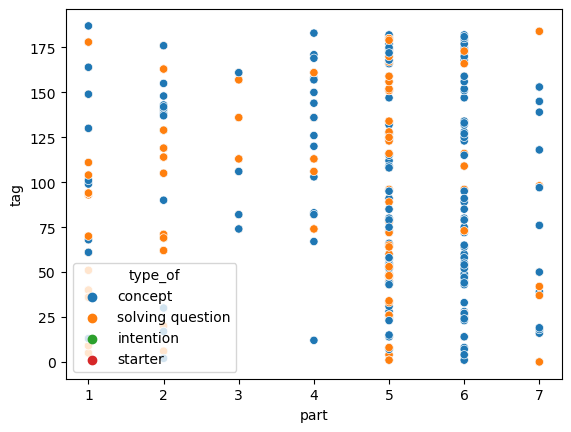

In [22]:
sns.scatterplot(data = lectures_df, x = 'part', y = 'tag', hue = 'type_of')


<AxesSubplot:xlabel='tag', ylabel='Count'>

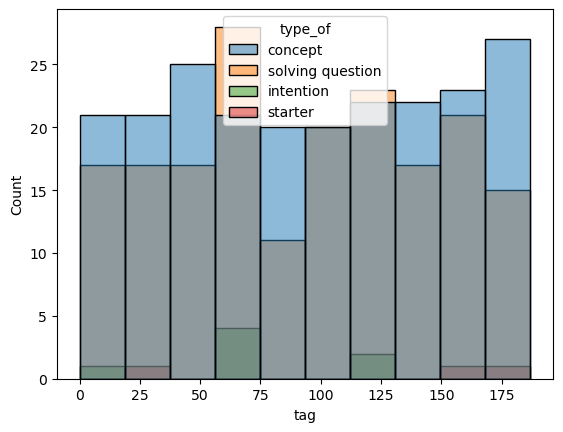

In [23]:
sns.histplot(data = lectures_df, x = 'tag', hue = 'type_of')

Из графиков можно сделать вывод, что явной связи тегов и описаний лекций нет

Наконец проанализируем связь разделов и описаний лекций


<AxesSubplot:xlabel='part', ylabel='Count'>

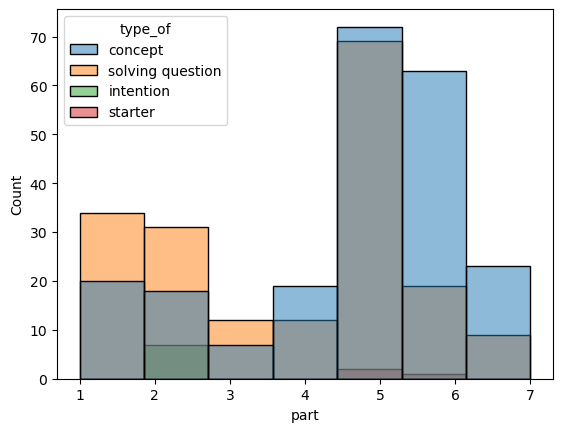

In [24]:
sns.histplot(data = lectures_df, x = 'part', hue = 'type_of', bins = 7)

# 2.4. Промежуточные выводы

По результатам аналза следует, что в первых трех разделах больше практики, в остальных - теориию.

# Часть 3. Обработка файла train.csv (метаданные ответов на заданные студентам вопросы)

# 3. 1. Структура 

- row_id: (int64) идентификатор строки.
- timestamp: (int64) время в миллисекундах между этим взаимодействием со студентом и завершением первого события от данного студента.
- user_id: (int32) идентификатор студента.
- content_id: (int16) идентификатор взаимодействия со студентом.
- content_type_id: (int8) идентификатор типа контента. 0, если контентом был заданный студенту вопрос, 1 - просмотр студентом лекции.
- task_container_id: (int16) идентификатор набора вопросов или лекций. Например, студент может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий идентификатор набора.
- user_answer: (int8) ответ студента на вопрос, если они есть. Для лекций считать -1 как null.
- answered_correctly: (int8) был ли ответ студента на вопрос правильным. Для лекций считать -1 как null.
- prior_question_elapsed_time: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.
- prior_question_had_explanation: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

# 3. 2. Анализ

# 3.2.1 Общеинформационный анализ

In [25]:
df = pd.read_csv('train.csv', encoding = 'utf-8')
df.shape

(101230332, 10)

Выведем строки датафрейма df c помощью метода .head

In [26]:
df.head()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


Произведем анализ датафрема df на наличие категориальных и числовых столбцов:

In [27]:
cat_col = []
num_col = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_col += [column_name]
    else:
        num_col += [column_name]

print('Категориальные данные:\t ',cat_col, '\n Число столбцов =', len(cat_col))
print('Числовые данные:\t ', num_col, '\n Число столбцов =', len(num_col))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столбцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столбцов = 9


Выводим статистику по числовым признакам датафрейма df c помощью метода .describe

In [28]:
df.describe()

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,1.012303e+08,9.887879e+07
mean,5.061517e+07,7.703644e+09,1.076732e+09,5.219605e+03,1.935222e-02,9.040624e+02,1.376123e+00,6.251644e-01,2.542381e+04
std,2.922268e+07,1.159266e+10,6.197163e+08,3.866359e+03,1.377596e-01,1.358302e+03,1.192896e+00,5.225307e-01,1.994815e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,2.530758e+07,5.243436e+08,5.408116e+08,2.063000e+03,0.000000e+00,1.040000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,5.061517e+07,2.674234e+09,1.071781e+09,5.026000e+03,0.000000e+00,3.820000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,7.592275e+07,9.924551e+09,1.615742e+09,7.425000e+03,0.000000e+00,1.094000e+03,3.000000e+00,1.000000e+00,2.966600e+04
max,1.012303e+08,8.742577e+10,2.147483e+09,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


# 3.2.2. Анализ распределения значений

Рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

Сперва столбцы с "большими" значениями

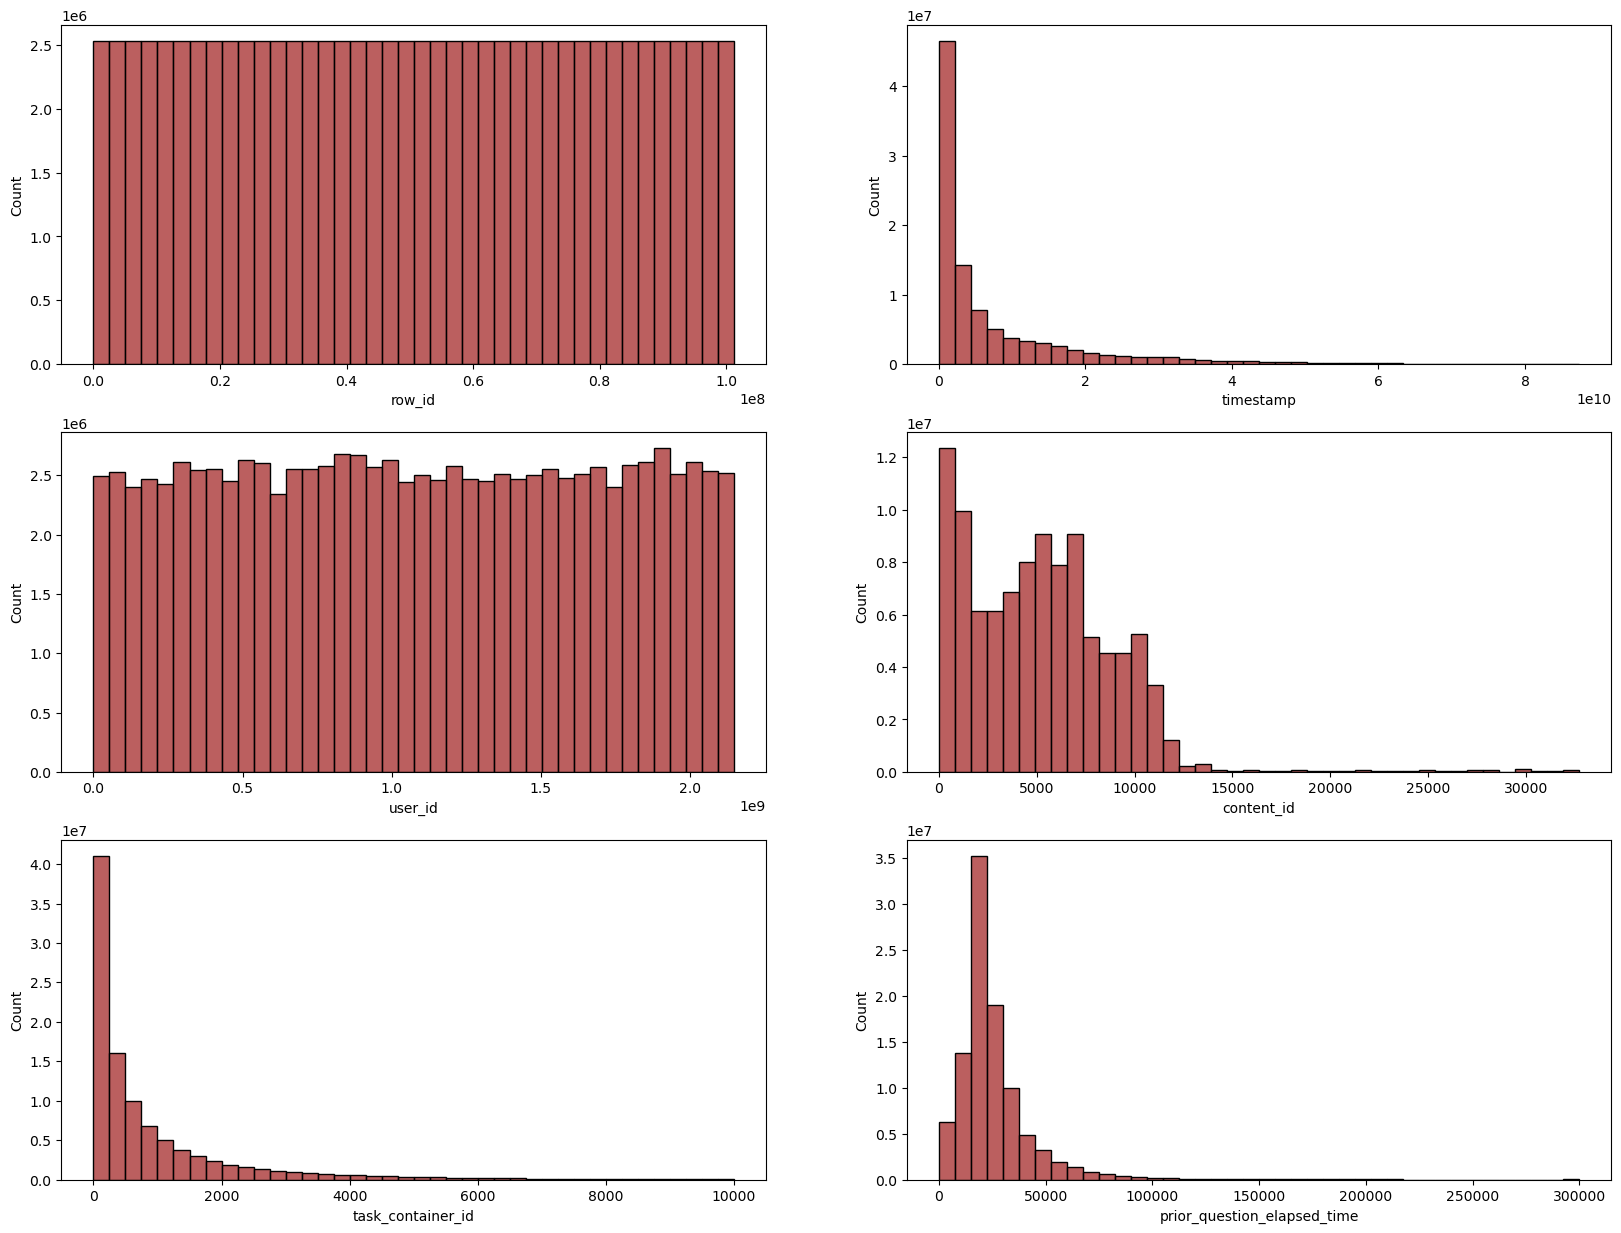

In [29]:
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (20, 15))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 40, color = 'brown')

Затем рассмотрим столбцы с "маленькими" значениями

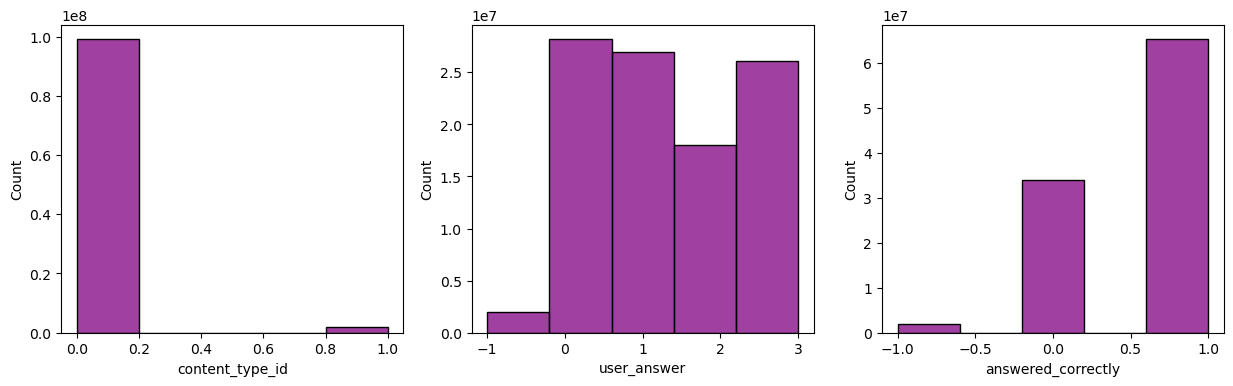

In [30]:
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 5, color = 'purple')

Осуществим очистку данных. Для этого:

Ищем пропуски в датафрейме questions_df с помощью метода .isna()

In [31]:
df.isna().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: int64

Как мы можем увидеть в датафрейме df имеются дубликаты в столбце времени ответа на каждый вопрос и в столбце просмотра объяснений и правильных ответов.
В столбце времени ответа на каждый вопрос есть 2351538 пропуска.
В столбце просмотра объяснений и правильных ответов их 392506.

Выведем пропуски в столбце времени ответа на каждый вопрос:

In [32]:
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101230195,101230195,1073593458,2147482216,21887,1,170,-1,-1,NaN,False
101230218,101230218,1240316256,2147482216,6808,1,193,-1,-1,NaN,False
101230220,101230220,1240470616,2147482216,27699,1,195,-1,-1,NaN,False
101230222,101230222,1240524060,2147482216,5752,1,197,-1,-1,NaN,False


Пропуски обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.

Теперь выведем пропуски в столбце просмотра объяснений и правильных ответов.

In [33]:
df[df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
101228989,101228989,0,2147470770,7900,0,0,0,1,NaN,NaN
101229217,101229217,0,2147470777,7900,0,0,2,0,NaN,NaN
101229975,101229975,0,2147481750,4137,0,0,0,0,NaN,NaN
101230025,101230025,0,2147482216,3748,0,0,1,0,NaN,NaN


Здесь пропуски обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.

Далее осуществим поиск дубликатов в датафрейме df


In [34]:
df.duplicated().sum()

0

Как мы можем увидеть, дубликаты в датафрейме df отсутствуют.

Теперь с помощью метода .info выведем справку о количестве значений в каждом столбце и типе данных рассматриваемого датафрейма

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int64  
 3   content_id                      int64  
 4   content_type_id                 int64  
 5   task_container_id               int64  
 6   user_answer                     int64  
 7   answered_correctly              int64  
 8   prior_question_elapsed_time     float64
 9   prior_question_had_explanation  object 
dtypes: float64(1), int64(8), object(1)
memory usage: 7.5+ GB


# 3.2.3. Промежуточные выводы
По результатам анализа сведений, полученных в результате предварительной обработки данных, можно сделать следующие выводы:
- столбец row_id совпадает с индексом датафрейма df;
- датафрейм df занимает 7.5+ GB памяти.

# 3.2.4. Предложения
- удалить столбец row_id;
- изменить формат хранения некоторых данных при помощи метода .astype для уменьшения объёма памяти, занимаемой датафреймом, и увеличения скорости исследования.

In [36]:
df = df.drop('row_id', axis = 1)
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')

Выведем обновленную информацию датафрейма при помощи метода .info

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       uint64 
 1   user_id                         uint32 
 2   content_id                      uint16 
 3   content_type_id                 int8   
 4   task_container_id               uint16 
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 2.9+ GB


Определим, во сколько раз изменился размер датафрейма


In [38]:
print(round(7.5 / 2.9, 1))

2.6


Таким образом, после выполненной обработки объем памяти, занимаемый датафремом уменьшился в 2,6 раза

# 3.2.5 Анализ зависимостей

Далее рассмотрим корреляцию числовых признаков и их связь с успеваемостью студентов:

In [39]:
cm = sns.color_palette("vlag", as_cmap = True)
df_corr = df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.000041,0.052931,0.000974,0.433359,0.000724,0.025452,0.013934
user_id,-0.000041,1.000000,0.000868,-0.000150,0.001498,0.000156,-0.000307,0.000308
content_id,0.052931,0.000868,1.000000,0.414640,0.046304,-0.106668,-0.196960,0.151661
content_type_id,0.000974,-0.000150,0.414640,1.000000,-0.019647,-0.279818,-0.436912,nan
task_container_id,0.433359,0.001498,0.046304,-0.019647,1.000000,0.008532,0.061129,-0.013412
user_answer,0.000724,0.000156,-0.106668,-0.279818,0.008532,1.000000,0.126471,0.014570
answered_correctly,0.025452,-0.000307,-0.196960,-0.436912,0.061129,0.126471,1.000000,-0.007900
prior_question_elapsed_time,0.013934,0.000308,0.151661,nan,-0.013412,0.014570,-0.007900,1.000000


Дополнительно добавим столбец соотношения количества правильных ответов к количеству ответов студентов и выведем обновленную корреляцию числовых признаков:

In [64]:
df_corr['progress'] = df_corr.answered_correctly / df_corr.user_answer
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio,progress
content_type_id,1.000000,-0.279818,-0.436912,0.244676,0.244676
user_answer,-0.279818,1.000000,0.126471,-0.529601,-0.529601
answered_correctly,-0.436912,0.126471,1.000000,0.532950,0.532950
cor_ratio,0.244676,-0.529601,0.532950,1.000000,1.000000
progress,0.244676,-0.529601,0.532950,1.000000,1.000000


Удалим ненужные столбцы и выведем обновленную корреляцию числовых признаков:

In [41]:
df_corr.drop(df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.279818,-0.436912,0.244676
user_answer,-0.279818,1.000000,0.126471,-0.529601
answered_correctly,-0.436912,0.126471,1.000000,0.532950
cor_ratio,0.244676,-0.529601,0.532950,1.000000


Затем выведем распределение успеваемости студентов:

<AxesSubplot:xlabel='progress', ylabel='Count'>

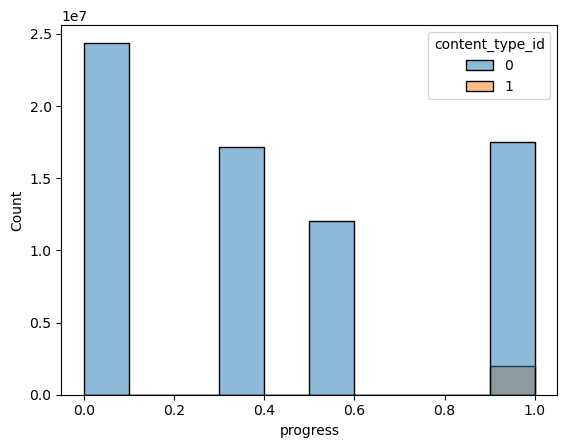

In [65]:
sns.histplot(data = df_corr, x = 'progress', hue = 'content_type_id', bins = 10)

Из графиков можно сделать вывод, что успеваемость слабо зависит от типа контента (вопрос или лекция).

Рассмотрим статистику ответов студентов

Произведем поиск уникальных индетификаторов студентов

In [43]:
df.agg({'user_id': pd.Series.nunique}) 

user_id    393656
dtype: int64

Сгруппируем общее количество ответов и количество правильных ответов каждого студента по его идентификатору в датафрейм answers_df

In [44]:
answers_df = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
answers_df.head()

,user_id,user_answer,answered_correctly
0,115,72.0,32.0
1,124,49.0,7.0
2,2746,31.0,10.0
3,5382,169.0,81.0
4,8623,149.0,67.0


Выведем статистику датафрейма answers_df:

In [45]:
answers_df.describe()

,user_id,user_answer,answered_correctly
count,3.936560e+05,393656.000000,393656.000000
mean,1.076358e+09,353.875889,160.763700
std,6.201319e+08,1038.467530,507.219402
min,1.150000e+02,0.000000,-11.000000
25%,5.387596e+08,37.000000,11.000000
50%,1.077717e+09,60.000000,23.000000
75%,1.613533e+09,214.000000,92.000000
max,2.147483e+09,25162.000000,14229.000000


Введем функцию, которая осуществляет сокращение разброса количества ответов студентов:

In [46]:
def rem_emission(df, col, k_std): # зададим функцию
        mean = df[col].mean() # среднее значение переданного столбца col
        std_o = df[col].std() # стандартное отклонение переданного столбца col
        return df[(df[col] <= mean + (k_std * std_o))]

Применим созданную функцию сокращения разброса ответов к датафрейму answers_df:

In [47]:
answers_df = rem_emission(answers_df, 'user_answer', 1) 

Дополнительно добавим столбец progress успеваемости (соотношения количества правильных ответов к общему количеству ответов студентов):

In [48]:
answers_df['progress'] = answers_df.answered_correctly / answers_df.user_answer

Затем выведем первые 5 и последние 5 строк преобразованного датафрейма answers_df:

In [49]:
answers_df

,user_id,user_answer,answered_correctly,progress
0,115,72.0,32.0,0.444444
1,124,49.0,7.0,0.142857
2,2746,31.0,10.0,0.322581
3,5382,169.0,81.0,0.479290
4,8623,149.0,67.0,0.449664
...,...,...,...,...
393651,2147470770,308.0,171.0,0.555195
393652,2147470777,1066.0,514.0,0.482176
393653,2147481750,52.0,38.0,0.730769
393654,2147482216,363.0,172.0,0.473829


Выведем обновленную статистику датафрейма answers_df при помощи метода .describe:

In [50]:
answers_df.describe()

,user_id,user_answer,answered_correctly,progress
count,3.706320e+05,370632.000000,370632.000000,3.706150e+05
mean,1.076382e+09,162.647402,69.718044,inf
std,6.201116e+08,247.494832,115.027280,NaN
min,1.150000e+02,0.000000,-11.000000,-1.929825e-01
25%,5.386172e+08,36.000000,11.000000,2.926829e-01
50%,1.077896e+09,55.000000,20.000000,3.902439e-01
75%,1.613481e+09,159.000000,67.000000,4.705882e-01
max,2.147483e+09,1392.000000,920.000000,inf


# 3.2.5.1 Рассмотрем зависимость успеваемости студентов от общего количества ответов 

Рассчитаем медианное значение количества ответов студентов:

In [51]:
answers_med = answers_df.user_answer.median()
print(int(answers_med))

55


Визуализируем данные о количестве ответов студентов:

<AxesSubplot:xlabel='user_answer', ylabel='Count'>

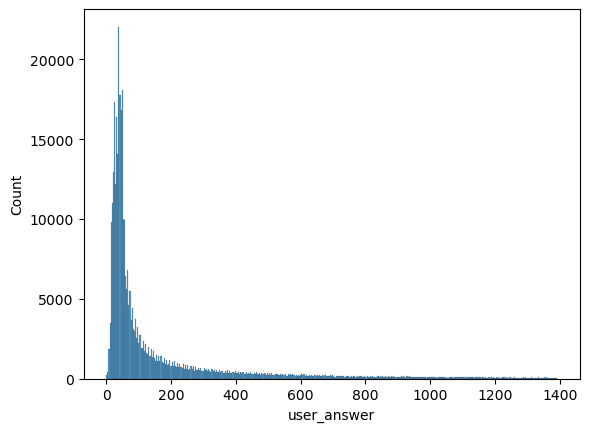

In [52]:
sns.histplot(data = answers_df, x = 'user_answer')

Из графика видно заметное смещение количества ответов в интервал от 0 до 100.

Визуализируем распределение количества ответов студентов, которое больше медианного:

0.42748091603053434


<AxesSubplot:>

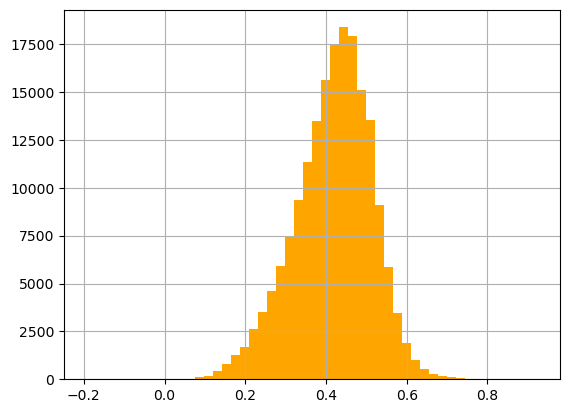

In [53]:
print(answers_df.query('user_answer > 55')['progress'].median())
answers_df.query('user_answer > 55')['progress'].hist(bins = 50, color = 'orange')

Визуализиурем распределение количества ответов студентов, которое которое больше 75%:


0.44871794871794873


<AxesSubplot:>

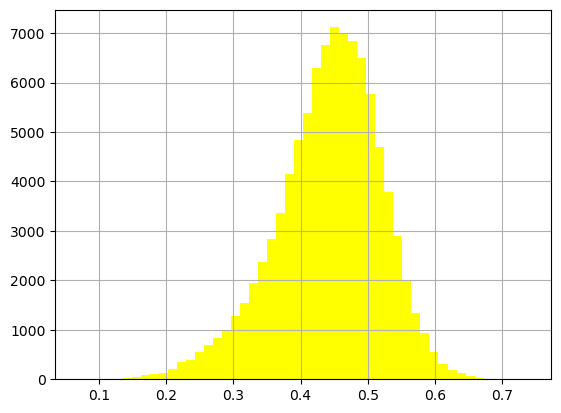

In [54]:
print(answers_df.query('user_answer > 151')['progress'].median())
answers_df.query('user_answer > 151')['progress'].hist(bins = 50, color = 'yellow')

Визуализируем распределение количества ответов студентов, которое больше 100:

0.44360902255639095


<AxesSubplot:>

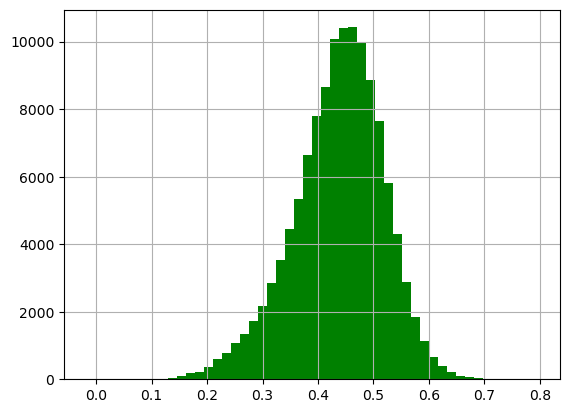

In [55]:
print(answers_df.query('user_answer > 100')['progress'].median())
answers_df.query('user_answer > 100')['progress'].hist(bins = 50, color = 'green')

Визуализируем распределение количества ответов студентов, которое больше 50:

0.42168674698795183


<AxesSubplot:>

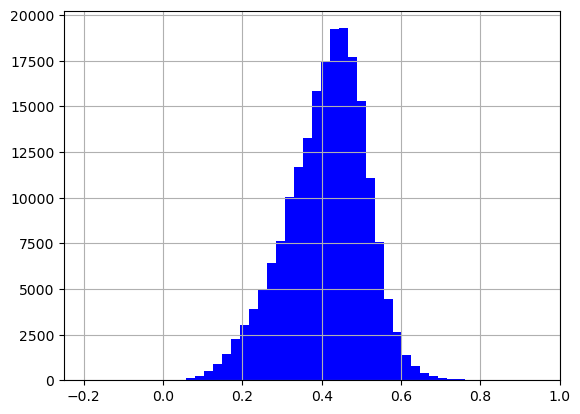

In [56]:
print(answers_df.query('0 < user_answer > 50')['progress'].median())
answers_df.query('0 < user_answer > 50')['progress'].hist(bins = 50, color = 'blue')

Исходя из полученых графиков можно сделать вывод, что успеваемость студентов, ответивших на количество вопросов, которое меньше медианного значения, хуже по сравнению с теми, кто ответил на количество вопросов, которое больше медианного значения.

При этом количество ответов, которое выше медианного значения, незначительно сказывается на качественных показателях исследования, то есть на количестве правильных ответов.

# 3.2.5.2 Теперь определим возможные взаимные связи таких показателей, как время взаимодействия со студентом, завершение первого события от него, среднее время ответа на каждый вопрос, количество правильных ответов, общее количество ответов студентов.

Сгруппируем общее количество ответов, количество правильных ответов и время ответа на каждый вопрос студентов по их идентификаторам в датафрейм correlation:

In [66]:
correlation = df[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()

Дополнительно добавим столбец timestamp_ratio соотношения времени между взаимодействием со студентом и завершением первого события от него к общему количеству ответов студентов:

In [67]:
correlation['timestamp_ratio'] = correlation ['timestamp'] / correlation ['user_answer']

Кроме этого, добавим столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему количеству ответов студентов:

In [68]:
correlation ['elapsed_time_ratio'] = correlation['prior_question_elapsed_time'] / correlation['user_answer']

Помимо этого, добавим столбец progress - успеваемости (соотношения количетсва правильных ответов к общему количеству ответов студентов)


In [69]:
correlation['performance'] = correlation.answered_correctly / correlation.user_answer

Кроме того, удаляем ненужные столбцы:

In [70]:
correlation.drop(correlation.columns[[0, 2, 3, 4]], axis = 1, inplace = True)

Наконец, вызываем функцию сокращения разброса ответов:

In [71]:
correlation = rem_emission(correlation, 'user_answer', 1)

Осуществим проверку проведенных операций и выводим выводим первые 5 и последние 5 строк полученного датафрейма correlation:

In [72]:
correlation

,user_answer,timestamp_ratio,elapsed_time_ratio,performance
0,72.0,6.524638e+07,12458.319444,0.444444
1,49.0,2.252203e+05,11122.387755,0.142857
2,31.0,2.472123e+05,10483.870968,0.322581
3,169.0,2.879101e+08,26449.704142,0.479290
4,149.0,2.615750e+08,18923.489933,0.449664
...,...,...,...,...
393651,308.0,8.478458e+08,16924.224026,0.555195
393652,1066.0,8.108421e+09,14109.855535,0.482176
393653,52.0,2.110661e+07,16903.846154,0.730769
393654,363.0,6.621266e+08,14765.840220,0.473829


# 3.2.5.3 Визуализируем указанные выше зависимости с использованием функции regplot()

/Users/ivanivanov/opt/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<AxesSubplot:xlabel='user_answer', ylabel='timestamp_ratio'>

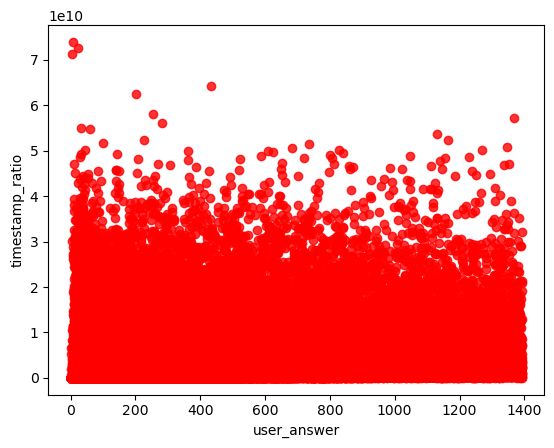

In [73]:
sns.regplot(data = correlation, x = 'user_answer', y = 'timestamp_ratio', color = 'red')

<AxesSubplot:xlabel='user_answer', ylabel='elapsed_time_ratio'>

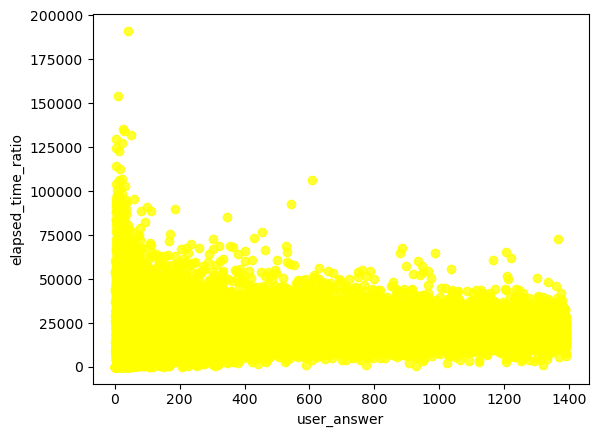

In [74]:
sns.regplot(data = correlation, x = 'user_answer', y = 'elapsed_time_ratio', color = 'yellow')

/Users/ivanivanov/opt/anaconda3/lib/python3.9/site-packages/numpy/core/function_base.py:151: RuntimeWarning: invalid value encountered in multiply
  y *= step


<AxesSubplot:xlabel='timestamp_ratio', ylabel='performance'>

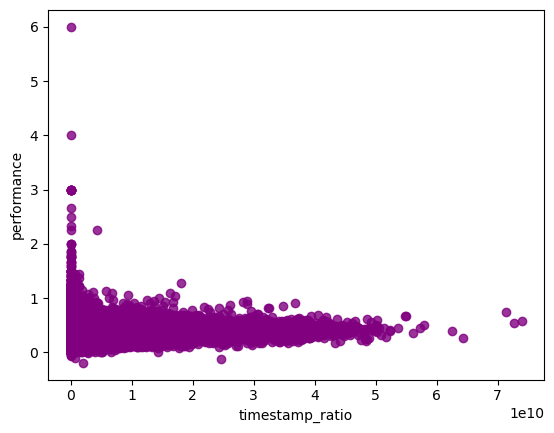

In [75]:
sns.regplot(data = correlation, x = 'timestamp_ratio', y = 'performance', color = 'purple')

<AxesSubplot:xlabel='elapsed_time_ratio', ylabel='performance'>

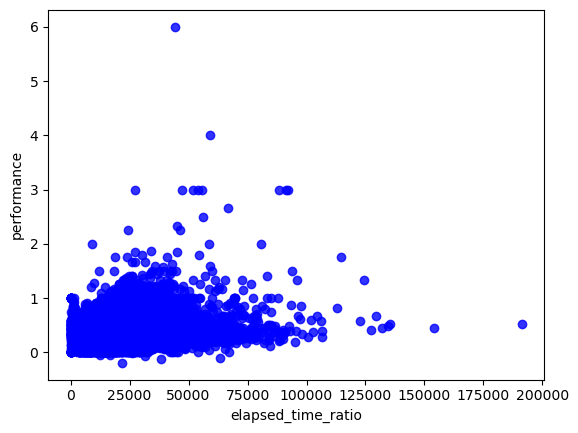

In [76]:
sns.regplot(data = correlation, x = 'elapsed_time_ratio', y = 'performance', color = 'blue')


# Выводы

По результатам проведенного анализа можно сделать выводы о том, что:
-  на успеваемость студентов влияет главным образом количество ответов студентов, которое больше медианного значения количества ответов (которое, в свою очередь, равно 55 ответам);
- при этом тип контента и соотношение количества правильных ответов к среднему времени ответа на каждый вопрос либо к общему количеству ответов студентов - влияют на успеваемость слабо.